In [1]:
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPool2D, Conv2DTranspose, UpSampling2D, Reshape
from tensorflow.keras.models import Sequential, Model
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# results_AU movie is made with many frames
# Let's continue by skipping frames to have more diverse positions of the monster

In [18]:
output_path = 'video.avi'
fps = 10
image_counter=0#126742+1
memory_size = 3200
batch_size = 32
losses = []
frames = []

In [19]:
encoder_input_layer = Input([480, 640,1])

encoder_layers = Conv2D(8, (3,3), activation="relu", padding="same")(encoder_input_layer)
encoder_layers = MaxPool2D()(encoder_layers)

encoder_layers = Conv2D(16, (3,3), activation="relu", padding="same")(encoder_layers)
encoder_layers = MaxPool2D()(encoder_layers)

encoder_layers = Conv2D(32, (3,3), activation="relu", padding="same")(encoder_layers)
encoder_layers = MaxPool2D()(encoder_layers)

encoder_layers = Conv2D(32, (3,3), activation="relu", padding="same")(encoder_layers)
encoder_layers = MaxPool2D()(encoder_layers)

encoder_layers = Flatten()(encoder_layers)

encoder_layers = Dense(32)(encoder_layers)

# decoder_input_layer = Input([32])

decoder_layers = Dense(38400, input_shape=[32])(encoder_layers)

decoder_layers = Reshape([30, 40, 32])(decoder_layers)

decoder_layers = UpSampling2D()(decoder_layers)
decoder_layers = Conv2DTranspose(32, (3,3), activation="relu", padding="same")(decoder_layers)

decoder_layers = UpSampling2D()(decoder_layers)
decoder_layers = Conv2DTranspose(32, (3,3), activation="relu", padding="same")(decoder_layers)

decoder_layers = UpSampling2D()(decoder_layers)
decoder_layers = Conv2DTranspose(16, (3,3), activation="relu", padding="same")(decoder_layers)

decoder_layers = UpSampling2D()(decoder_layers)
decoder_layers = Conv2DTranspose(8, (3,3), activation="relu", padding="same")(decoder_layers)

decoder_layers = Conv2D(1, (3,3), activation="sigmoid", padding="same")(decoder_layers)

# Models 
autoencoder_model = Model(encoder_input_layer, decoder_layers)
encoder_model = Model(encoder_input_layer, encoder_layers)
decoder_model = Sequential(autoencoder_model.layers[11:])

# Compile model
autoencoder_model.compile(optimizer="adam", loss="mse")

In [20]:
# plt.imshow(autoencoder_model.predict(np.expand_dims(frame,0))[0])
# plt.figure()
# plt.imshow(frame)

In [21]:
# autoencoder_model.save_weights("./weights/AU_01_04_2020_0.h5")

In [22]:
# autoencoder_model.load_weights("./weights/AU_01_04_2020_0.h5")
# autoencoder_model.load_weights("./weights/temp_{}.h5".format(image_counter-1))

In [ ]:

from __future__ import print_function
import vizdoom as vzd

from random import choice
from time import sleep

vizdoom_path = "../../../../Mech Punk/Anaconda3/envs/vizdoom/lib/vizdoom/scenarios/"

if __name__ == "__main__":
    # Create DoomGame instance. It will run the game and communicate with you.
    game = vzd.DoomGame()

    # Now it's time for configuration!
    # load_config could be used to load configuration instead of doing it here with code.
    # If load_config is used in-code configuration will also work - most recent changes will add to previous ones.
    # game.load_config("../../scenarios/basic.cfg")

    # Sets path to additional resources wad file which is basically your scenario wad.
    # If not specified default maps will be used and it's pretty much useless... unless you want to play good old Doom.
    game.set_doom_scenario_path(vizdoom_path + "basic.wad")
    # Sets map to start (scenario .wad files can contain many maps).
    game.set_doom_map("map01")

    # Sets resolution. Default is 320X240
    game.set_screen_resolution(vzd.ScreenResolution.RES_640X480)

    # Sets the screen buffer format. Not used here but now you can change it. Default is CRCGCB.
    game.set_screen_format(vzd.ScreenFormat.GRAY8)

    # Enables depth buffer.
    game.set_depth_buffer_enabled(True)

    # Enables labeling of in game objects labeling.
    game.set_labels_buffer_enabled(True)

    # Enables buffer with top down map of the current episode/level.
    game.set_automap_buffer_enabled(True)

    # Enables information about all objects present in the current episode/level.
    game.set_objects_info_enabled(True)

    # Enables information about all sectors (map layout).
    game.set_sectors_info_enabled(True)

    # Sets other rendering options (all of these options except crosshair are enabled (set to True) by default)
    game.set_render_hud(False)
    game.set_render_minimal_hud(False)  # If hud is enabled
    game.set_render_crosshair(False)
    game.set_render_weapon(True)
    game.set_render_decals(False)  # Bullet holes and blood on the walls
    game.set_render_particles(False)
    game.set_render_effects_sprites(False)  # Smoke and blood
    game.set_render_messages(False)  # In-game messages
    game.set_render_corpses(False)
    game.set_render_screen_flashes(True)  # Effect upon taking damage or picking up items

    # Adds buttons that will be allowed.
    game.add_available_button(vzd.Button.MOVE_LEFT)
    game.add_available_button(vzd.Button.MOVE_RIGHT)
    game.add_available_button(vzd.Button.ATTACK)

    # Adds game variables that will be included in state.
    game.add_available_game_variable(vzd.GameVariable.AMMO2)

    # Causes episodes to finish after 200 tics (actions)
    game.set_episode_timeout(200)

    # Makes episodes start after 10 tics (~after raising the weapon)
    game.set_episode_start_time(10)

    # Makes the window appear (turned on by default)
    game.set_window_visible(False)

    # Turns on the sound. (turned off by default)
    game.set_sound_enabled(False)

    # Sets the livin reward (for each move) to -1
    game.set_living_reward(-1)

    # Sets ViZDoom mode (PLAYER, ASYNC_PLAYER, SPECTATOR, ASYNC_SPECTATOR, PLAYER mode is default)
    game.set_mode(vzd.Mode.PLAYER)

    # Enables engine output to console.
    #game.set_console_enabled(True)

    # Initialize the game. Further configuration won't take any effect from now on.
    game.init()

    # Define some actions. Each list entry corresponds to declared buttons:
    # MOVE_LEFT, MOVE_RIGHT, ATTACK
    # game.get_available_buttons_size() can be used to check the number of available buttons.
    # 5 more combinations are naturally possible but only 3 are included for transparency when watching.
    actions = [[True, False, False], [False, True, False], [False, False, True]]

    # Run this many episodes
    episodes = 100000000

    # Sets time that will pause the engine after each action (in seconds)
    # Without this everything would go too fast for you to keep track of what's happening.
    sleep_time = 1.0 / vzd.DEFAULT_TICRATE  # = 0.028
    
    frame_counter = 0
    counter = 0

    for i in range(episodes):
        print("Episode #" + str(i + 1))
        if i % 1000 == 0:
            autoencoder_model.save_weights("./weights/gray_AE_{}.h5".format(image_counter))

        # Starts a new episode. It is not needed right after init() but it doesn't cost much. At least the loop is nicer.
        game.new_episode()

        action_counter = 0
        
        while not game.is_episode_finished():
            
            action_counter-=1
            frame_counter+=1

            # Gets the state
            state = game.get_state()

            # Which consists of:
            n = state.number
            vars = state.game_variables
            screen_buf = state.screen_buffer
            depth_buf = state.depth_buffer
            labels_buf = state.labels_buffer
            automap_buf = state.automap_buffer
            labels = state.labels
            objects = state.objects
            sectors = state.sectors
            
            if frame_counter % 11 == 0:
                frame = screen_buf/255
                frames.append(frame)
#             if len(frames) > 32:
#                 counter+=1
#                 frames.pop(0)
                if len(frames) > memory_size:
                    counter+=1
                    frames.pop(0)

                if counter % batch_size == 0 and counter > batch_size-1:
                    batch_indices = np.random.choice(np.arange(len(frames)), batch_size, replace=False)

                    images = np.expand_dims(np.array([frames[index] for index in batch_indices]),axis=3)

    #             if counter % 32 == 0 and counter > 31:
    #                 images = np.array(frames)
                    loss = autoencoder_model.train_on_batch(images, images)
                    losses.append(loss)
    #                 results.append(autoencoder_model.predict(np.expand_dims(frame, 0))[0])
    #                 print('a')
    #                 print(image_counter)
                    result = autoencoder_model.predict(images[:1])[0]
                    RGB_img = np.uint8(255*result)
                    cv2.imwrite('../../../../Mech Punk/Documents/Gray_AE_results/{}.png'.format(image_counter),RGB_img)
                    image_counter+=1

    #                 if len(results) > 5:

    #                     out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, (480,640))
    #                     for i in range(len(results)):
    #                         # writing to a image array
    #                         out.write(results[i])
    #                     out.release()

    #                     del results[:]

    #                 plt.figure(figsize=(14,6))
    #                 plt.subplot(1,2,1)
    #                 plt.imshow(autoencoder_model.predict(np.expand_dims(frame, 0))[0])
    #                 plt.subplot(1,2,2)
    #                 plt.imshow(frame)
    #                 plt.show()

            # Games variables can be also accessed via:
            #game.get_game_variable(GameVariable.AMMO2)

            # Makes a random action and get remember reward.
#             if action_counter < 0:
#                 r = game.make_action(choice(actions))
#                 action_counter = np.random.randint(0,10)

            if action_counter < 0:
                action = choice(actions)
                action_counter = np.random.randint(0,12)
            r = game.make_action(action)

            # Makes a "prolonged" action and skip frames:
            # skiprate = 4
            # r = game.make_action(choice(actions), skiprate)

            # The same could be achieved with:
            # game.set_action(choice(actions))
            # game.advance_action(skiprate)
            # r = game.get_last_reward()

            # Prints state's game variables and reward.
#             print("State #" + str(n))
#             print("Game variables:", vars)
#             print("Reward:", r)
#             print("=====================")

#             if sleep_time > 0:game.close())

        # Check how the episode went.
#         print("Episode finished.")
#         print("Total reward:", game.get_total_reward())
#         print("************************")

    # It will be done automatically anyway but sometimes you need to do it in the middle of the program...
    game.close()

Episode #1
Episode #2
Episode #3
Episode #4
Episode #5
Episode #6
Episode #7
Episode #8
Episode #9
Episode #10
Episode #11
Episode #12
Episode #13
Episode #14
Episode #15
Episode #16
Episode #17
Episode #18
Episode #19
Episode #20
Episode #21
Episode #22
Episode #23
Episode #24
Episode #25
Episode #26
Episode #27
Episode #28
Episode #29
Episode #30
Episode #31
Episode #32
Episode #33
Episode #34
Episode #35
Episode #36
Episode #37
Episode #38
Episode #39
Episode #40
Episode #41
Episode #42
Episode #43
Episode #44
Episode #45
Episode #46
Episode #47
Episode #48
Episode #49
Episode #50
Episode #51
Episode #52
Episode #53
Episode #54
Episode #55
Episode #56
Episode #57
Episode #58
Episode #59
Episode #60
Episode #61
Episode #62
Episode #63
Episode #64
Episode #65
Episode #66
Episode #67
Episode #68
Episode #69
Episode #70
Episode #71
Episode #72
Episode #73
Episode #74
Episode #75
Episode #76
Episode #77
Episode #78
Episode #79
Episode #80
Episode #81
Episode #82
Episode #83
Episode #84
E

Episode #640
Episode #641
Episode #642
Episode #643
Episode #644
Episode #645
Episode #646
Episode #647
Episode #648
Episode #649
Episode #650
Episode #651
Episode #652
Episode #653
Episode #654
Episode #655
Episode #656
Episode #657
Episode #658
Episode #659
Episode #660
Episode #661
Episode #662
Episode #663
Episode #664
Episode #665
Episode #666
Episode #667
Episode #668
Episode #669
Episode #670
Episode #671
Episode #672
Episode #673
Episode #674
Episode #675
Episode #676
Episode #677
Episode #678
Episode #679
Episode #680
Episode #681
Episode #682
Episode #683
Episode #684
Episode #685
Episode #686
Episode #687
Episode #688
Episode #689
Episode #690
Episode #691
Episode #692
Episode #693
Episode #694
Episode #695
Episode #696
Episode #697
Episode #698
Episode #699
Episode #700
Episode #701
Episode #702
Episode #703
Episode #704
Episode #705
Episode #706
Episode #707
Episode #708
Episode #709
Episode #710
Episode #711
Episode #712
Episode #713
Episode #714
Episode #715
Episode #716

Episode #1251
Episode #1252
Episode #1253
Episode #1254
Episode #1255
Episode #1256
Episode #1257
Episode #1258
Episode #1259
Episode #1260
Episode #1261
Episode #1262
Episode #1263
Episode #1264
Episode #1265
Episode #1266
Episode #1267
Episode #1268
Episode #1269
Episode #1270
Episode #1271
Episode #1272
Episode #1273
Episode #1274
Episode #1275
Episode #1276
Episode #1277
Episode #1278
Episode #1279
Episode #1280
Episode #1281
Episode #1282
Episode #1283
Episode #1284
Episode #1285
Episode #1286
Episode #1287
Episode #1288
Episode #1289
Episode #1290
Episode #1291
Episode #1292
Episode #1293
Episode #1294
Episode #1295
Episode #1296
Episode #1297
Episode #1298
Episode #1299
Episode #1300
Episode #1301
Episode #1302
Episode #1303
Episode #1304
Episode #1305
Episode #1306
Episode #1307
Episode #1308
Episode #1309
Episode #1310
Episode #1311
Episode #1312
Episode #1313
Episode #1314
Episode #1315
Episode #1316
Episode #1317
Episode #1318
Episode #1319
Episode #1320
Episode #1321
Episod

Episode #1837
Episode #1838
Episode #1839
Episode #1840
Episode #1841
Episode #1842
Episode #1843
Episode #1844
Episode #1845
Episode #1846
Episode #1847
Episode #1848
Episode #1849
Episode #1850
Episode #1851
Episode #1852
Episode #1853
Episode #1854
Episode #1855
Episode #1856
Episode #1857
Episode #1858
Episode #1859
Episode #1860
Episode #1861
Episode #1862
Episode #1863
Episode #1864
Episode #1865
Episode #1866
Episode #1867
Episode #1868
Episode #1869
Episode #1870
Episode #1871
Episode #1872
Episode #1873
Episode #1874
Episode #1875
Episode #1876
Episode #1877
Episode #1878
Episode #1879
Episode #1880
Episode #1881
Episode #1882
Episode #1883
Episode #1884
Episode #1885
Episode #1886
Episode #1887
Episode #1888
Episode #1889
Episode #1890
Episode #1891
Episode #1892
Episode #1893
Episode #1894
Episode #1895
Episode #1896
Episode #1897
Episode #1898
Episode #1899
Episode #1900
Episode #1901
Episode #1902
Episode #1903
Episode #1904
Episode #1905
Episode #1906
Episode #1907
Episod

Episode #2423
Episode #2424
Episode #2425
Episode #2426
Episode #2427
Episode #2428
Episode #2429
Episode #2430
Episode #2431
Episode #2432
Episode #2433
Episode #2434
Episode #2435
Episode #2436
Episode #2437
Episode #2438
Episode #2439
Episode #2440
Episode #2441
Episode #2442
Episode #2443
Episode #2444
Episode #2445
Episode #2446
Episode #2447
Episode #2448
Episode #2449
Episode #2450
Episode #2451
Episode #2452
Episode #2453
Episode #2454
Episode #2455
Episode #2456
Episode #2457
Episode #2458
Episode #2459
Episode #2460
Episode #2461
Episode #2462
Episode #2463
Episode #2464
Episode #2465
Episode #2466
Episode #2467
Episode #2468
Episode #2469
Episode #2470
Episode #2471
Episode #2472
Episode #2473
Episode #2474
Episode #2475
Episode #2476
Episode #2477
Episode #2478
Episode #2479
Episode #2480
Episode #2481
Episode #2482
Episode #2483
Episode #2484
Episode #2485
Episode #2486
Episode #2487
Episode #2488
Episode #2489
Episode #2490
Episode #2491
Episode #2492
Episode #2493
Episod

Episode #3009
Episode #3010
Episode #3011
Episode #3012
Episode #3013
Episode #3014
Episode #3015
Episode #3016
Episode #3017
Episode #3018
Episode #3019
Episode #3020
Episode #3021
Episode #3022
Episode #3023
Episode #3024
Episode #3025
Episode #3026
Episode #3027
Episode #3028
Episode #3029
Episode #3030
Episode #3031
Episode #3032
Episode #3033
Episode #3034
Episode #3035
Episode #3036
Episode #3037
Episode #3038
Episode #3039
Episode #3040
Episode #3041
Episode #3042
Episode #3043
Episode #3044
Episode #3045
Episode #3046
Episode #3047
Episode #3048
Episode #3049
Episode #3050
Episode #3051
Episode #3052
Episode #3053
Episode #3054
Episode #3055
Episode #3056
Episode #3057
Episode #3058
Episode #3059
Episode #3060
Episode #3061
Episode #3062
Episode #3063
Episode #3064
Episode #3065
Episode #3066
Episode #3067
Episode #3068
Episode #3069
Episode #3070
Episode #3071
Episode #3072
Episode #3073
Episode #3074
Episode #3075
Episode #3076
Episode #3077
Episode #3078
Episode #3079
Episod

Episode #3595
Episode #3596
Episode #3597
Episode #3598
Episode #3599
Episode #3600
Episode #3601
Episode #3602
Episode #3603
Episode #3604
Episode #3605
Episode #3606
Episode #3607
Episode #3608
Episode #3609
Episode #3610
Episode #3611
Episode #3612
Episode #3613
Episode #3614
Episode #3615
Episode #3616
Episode #3617
Episode #3618
Episode #3619
Episode #3620
Episode #3621
Episode #3622
Episode #3623
Episode #3624
Episode #3625
Episode #3626
Episode #3627
Episode #3628
Episode #3629
Episode #3630
Episode #3631
Episode #3632
Episode #3633
Episode #3634
Episode #3635
Episode #3636
Episode #3637
Episode #3638
Episode #3639
Episode #3640
Episode #3641
Episode #3642
Episode #3643
Episode #3644
Episode #3645
Episode #3646
Episode #3647
Episode #3648
Episode #3649
Episode #3650
Episode #3651
Episode #3652
Episode #3653
Episode #3654
Episode #3655
Episode #3656
Episode #3657
Episode #3658
Episode #3659
Episode #3660
Episode #3661
Episode #3662
Episode #3663
Episode #3664
Episode #3665
Episod

Episode #4181
Episode #4182
Episode #4183
Episode #4184
Episode #4185
Episode #4186
Episode #4187
Episode #4188
Episode #4189
Episode #4190
Episode #4191
Episode #4192
Episode #4193
Episode #4194
Episode #4195
Episode #4196
Episode #4197
Episode #4198
Episode #4199
Episode #4200
Episode #4201
Episode #4202
Episode #4203
Episode #4204
Episode #4205
Episode #4206
Episode #4207
Episode #4208
Episode #4209
Episode #4210
Episode #4211
Episode #4212
Episode #4213
Episode #4214
Episode #4215
Episode #4216
Episode #4217
Episode #4218
Episode #4219
Episode #4220
Episode #4221
Episode #4222
Episode #4223
Episode #4224
Episode #4225
Episode #4226
Episode #4227
Episode #4228
Episode #4229
Episode #4230
Episode #4231
Episode #4232
Episode #4233
Episode #4234
Episode #4235
Episode #4236
Episode #4237
Episode #4238
Episode #4239
Episode #4240
Episode #4241
Episode #4242
Episode #4243
Episode #4244
Episode #4245
Episode #4246
Episode #4247
Episode #4248
Episode #4249
Episode #4250
Episode #4251
Episod

Episode #4767
Episode #4768
Episode #4769
Episode #4770
Episode #4771
Episode #4772
Episode #4773
Episode #4774
Episode #4775
Episode #4776
Episode #4777
Episode #4778
Episode #4779
Episode #4780
Episode #4781
Episode #4782
Episode #4783
Episode #4784
Episode #4785
Episode #4786
Episode #4787
Episode #4788
Episode #4789
Episode #4790
Episode #4791
Episode #4792
Episode #4793
Episode #4794
Episode #4795
Episode #4796
Episode #4797
Episode #4798
Episode #4799
Episode #4800
Episode #4801
Episode #4802
Episode #4803
Episode #4804
Episode #4805
Episode #4806
Episode #4807
Episode #4808
Episode #4809
Episode #4810
Episode #4811
Episode #4812
Episode #4813
Episode #4814
Episode #4815
Episode #4816
Episode #4817
Episode #4818
Episode #4819
Episode #4820
Episode #4821
Episode #4822
Episode #4823
Episode #4824
Episode #4825
Episode #4826
Episode #4827
Episode #4828
Episode #4829
Episode #4830
Episode #4831
Episode #4832
Episode #4833
Episode #4834
Episode #4835
Episode #4836
Episode #4837
Episod

In [ ]:
result = frame
RGB_img = cv2.cvtColor(np.uint8(255*result), cv2.COLOR_BGR2RGB)
cv2.imwrite('../../../../Mech Punk/Documents/sample_image.png',RGB_img)

In [ ]:
encoded_frames = encoder_model.predict(np.array(frames[0:1000]))
mean_encoded_frames = np.mean(encoded_frames,axis=0)
min_encoded_frames = np.min(encoded_frames,axis=0)
max_encoded_frames = np.max(encoded_frames,axis=0)
std_encoded_frames = np.std(encoded_frames,axis=0)

In [10]:
mean_encoded_frames

array([ 3.4449093e-02, -3.7034119e-03, -3.5611201e-02,  2.9219726e-02,
        4.6551496e-02,  3.4341924e-02,  4.9938437e-01,  4.2733043e-03,
       -6.7217387e-02,  6.2464945e-02, -3.8992833e-02, -2.7761066e-02,
       -1.2536612e-01, -2.6538916e-02, -1.5790585e-01,  3.7138030e-02,
       -9.6420437e-02, -3.3931274e-02,  1.5215102e-02, -8.7415338e-02,
       -1.1431528e-01,  7.6597109e-02, -3.3325311e-02, -1.1910966e-01,
        1.0024630e-01,  6.0465198e-02, -3.4345370e-02,  6.8004780e-02,
       -2.9680582e-02, -1.5533355e-02, -4.6052434e-04, -1.0708397e-01],
      dtype=float32)

In [11]:
std_encoded_frames

array([0.29062623, 0.3643312 , 0.29398677, 0.28097087, 0.33886796,
       0.2890901 , 0.5117823 , 0.34292838, 0.26622352, 0.29336494,
       0.33672225, 0.3021062 , 0.32557398, 0.24529415, 0.40225896,
       0.29358354, 0.40413433, 0.3041146 , 0.3144117 , 0.2777403 ,
       0.32273215, 0.42250973, 0.34517628, 0.42825684, 0.41155642,
       0.2682035 , 0.49283504, 0.25903738, 0.2870324 , 0.2511177 ,
       0.37908322, 0.36941415], dtype=float32)

In [12]:
%matplotlib qt 
from tkinter import *
from IPython.display import clear_output
import time

master = Tk()

plt.figure(figsize=(14,5))
sp1 = plt.subplot(1,2,1)
sp2 = plt.subplot(1,2,2)

last_time_rendered=time.time()
initial_frame = 0
current_values = encoded_frames[initial_frame].copy()
def change_values():
    global last_time_rendered
    current_time = time.time()
    if current_time - last_time_rendered < 0.25:
        return
    
    for slider_index, slider in enumerate(sliders):
        current_values[slider_index]=slider.get()
    clear_output()
    last_time_rendered = current_time
    prediction = decoder_model.predict(current_values.reshape(1,-1))[0]
    base_line = decoder_model.predict(encoded_frames[initial_frame].reshape(1,-1))[0]
    
    sp1.clear()
    sp1.imshow(prediction)
    sp2.clear()
    sp2.imshow(np.abs(prediction-base_line))
    plt.draw()
    
def reset_values():
    global current_values
    current_values = encoded_frames[initial_frame].copy()
    for slider_index, slider in enumerate(sliders):
        initial_value = current_values[slider_index]
        slider.set(initial_value)
    change_values()
        
    
sliders=[]
number_of_sliders = len(mean_encoded_frames)
labels = {
    0:"move",
    1:"monster",
    2:"monster",
    3:"monster",
    4:"hand",
    5: "monster",
    6: "wall =)",
    7: "wall",
    8: "flame",
    9: "monster",
    10: "monster",
    11: "monster",
    12: "hand",
    13: "monster",
    14: "move ",
    15: "move ",
    16: "move",
    17: "monster",
    20:"monster",
    21:"gun =)",
    22:"gun",
    23:"move",
    25:"monster =)",
    26:"wall =)",
    28:"move =)",
    29:"move =)",
    30:"move =)",
}
for slider_index in range(number_of_sliders):
    mean_value = mean_encoded_frames[slider_index]
    std_value = std_encoded_frames[slider_index]
    min_value = min_encoded_frames[slider_index]
    max_value = max_encoded_frames[slider_index]
    initial_value = current_values[slider_index]
    try:
        label_name = labels[slider_index]
    except:
        label_name = "{}".format(slider_index)
    row_index, column_index = divmod(slider_index,8)
    label = Label(master,text=label_name)
    label.grid(row = row_index, column = 2*column_index, pady=1, padx = 2)
    slider = Scale(master, 
                   from_=mean_value-3*std_value, 
                   to=mean_value+3*std_value, 
                   resolution=0.00001, 
                   orient=HORIZONTAL, 
                   command=lambda value: change_values())
    slider.set(initial_value)
#     slider.pack(side=BOTTOM)
    slider.grid(row = row_index, column = 2*column_index+1, pady=1, padx = 2)
    sliders.append(slider)
    
button = Button (master, text="   RESET   ", command=reset_values)
button.grid(row=row_index+1)

mainloop()

In [36]:
slider.

<tkinter.Scale object .!scale32>

In [193]:
fourcc =  cv2.VideoWriter_fourcc(*'mp4v')
videowriter = cv2.VideoWriter(output_path,fourcc, fps, (640,480))
for result in results:
    RGB_img = cv2.cvtColor(np.uint8(255*result), cv2.COLOR_BGR2RGB)
    videowriter.write(RGB_img)
videowriter.release()

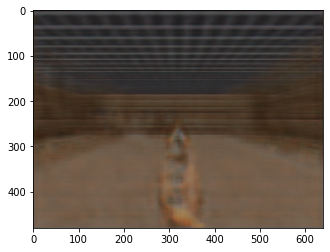

In [192]:
plt.imshow(np.uint8(255*result))

In [183]:

out = cv2.VideoWriter(output_path,cv2.VideoWriter_fourcc(*'DIVX'), fps, (480,640))
for i in range(len(results)):
    # writing to a image array
    out.write(np.uint8(results[i]))
out.release()

In [70]:
game.close()

In [142]:
autoencoder_model.summary()

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 480, 640, 3)]     0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 480, 640, 8)       224       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 240, 320, 8)       0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 240, 320, 16)      1168      
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 120, 160, 16)      0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 120, 160, 32)      4640      
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 60, 80, 32)        0  

In [132]:
frame = (screen_buf/255)

In [144]:
encoded_frame = encoder_model.predict(np.expand_dims(frame, 0))
encoded_frame

array([[-0.0639854 , -0.12212464,  0.12227813, -0.1574321 ,  0.15349567,
        -0.08113714, -0.02606815,  0.15255773,  0.07415448, -0.09375374,
        -0.10602891,  0.05207051,  0.12839992, -0.14103197,  0.29119465,
        -0.10072614,  0.12248326,  0.06323166,  0.08846203, -0.04380043,
         0.06410899,  0.05987906,  0.0982798 , -0.09744385, -0.04132511,
        -0.09595089,  0.31295055, -0.02734107,  0.05040722,  0.01034025,
         0.03155817, -0.28869236]], dtype=float32)

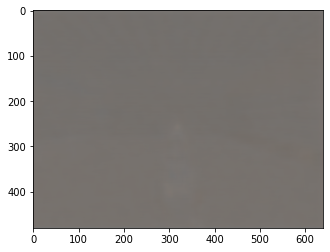

In [165]:
plt.imshow(decoder_model.predict(encoded_frame)[0])

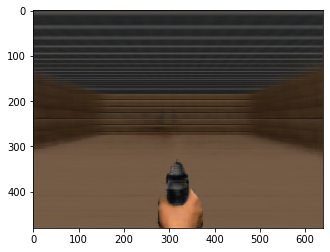

In [251]:
plt.imshow(autoencoder_model.predict(np.expand_dims(screen_buf/255, 0))[0])

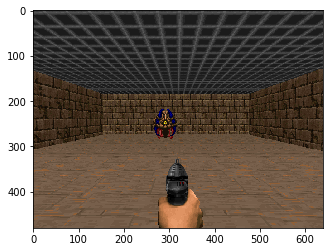

In [250]:
plt.imshow(screen_buf/255)

In [246]:
def get_game_state(state):
    game_object_state = []
    for game_object in state.objects:
        game_object_state = [
            game_object.angle,
    #         game_object.name,
            game_object.pitch,
            game_object.position_x,
            game_object.position_y,
            game_object.position_z,
            game_object.roll,
            game_object.velocity_x,
            game_object.velocity_y,
            game_object.velocity_z,]
        game_object_state+=game_object_state
    return game_object_state

In [247]:
get_game_state(state)

[180.00000004190952,
 0.0,
 0.0,
 60.504974365234375,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 180.00000004190952,
 0.0,
 0.0,
 60.504974365234375,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [236]:
state.objects[0].roll

0.0

In [237]:
game_object_states

[[0.0, 0.0, -384.0, 26.379196166992188, 0.0, 0.0, 0.0, -1.72308349609375, 0.0],
 [180.00000004190952, 0.0, 0.0, 60.504974365234375, 0.0, 0.0, 0.0, 0.0, 0.0]]

Episode #1


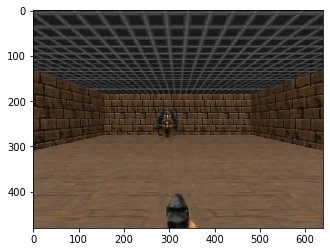

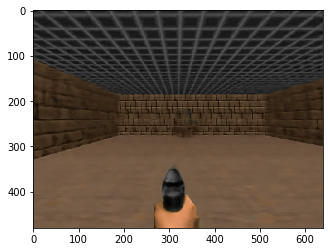

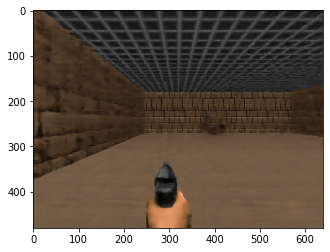

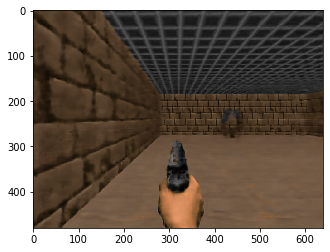

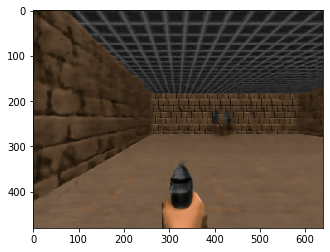

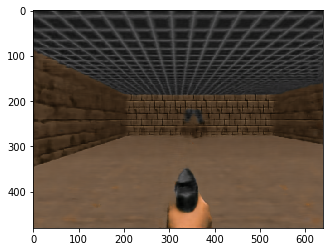

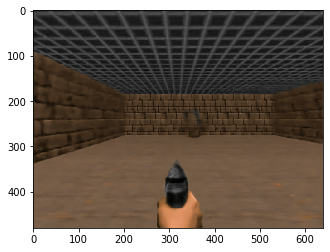

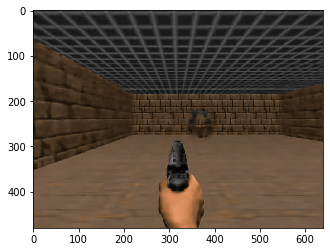

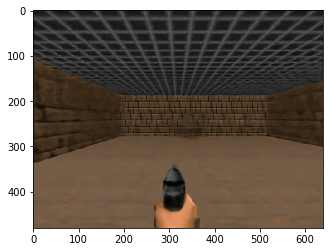

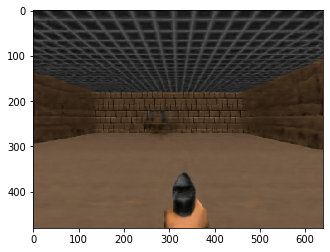

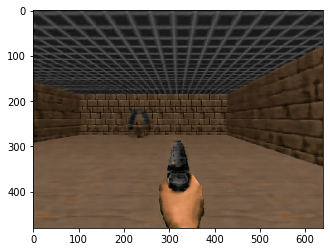

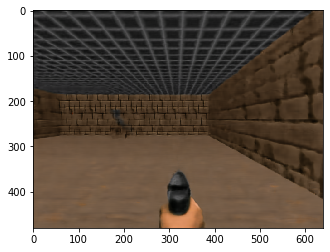

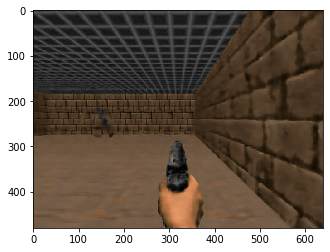

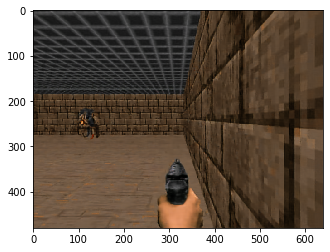

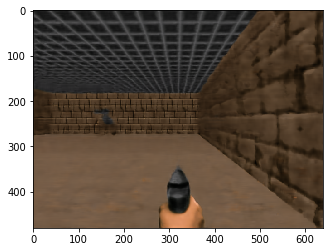

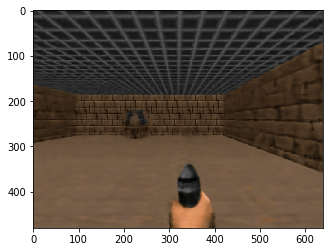

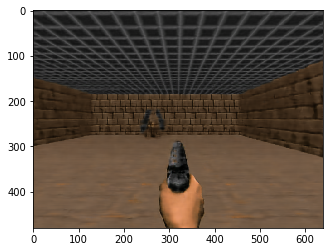

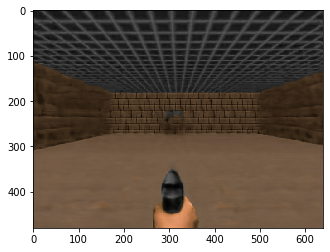

Episode #2


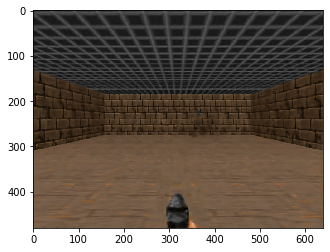

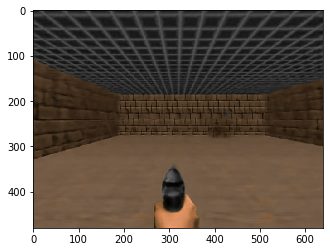

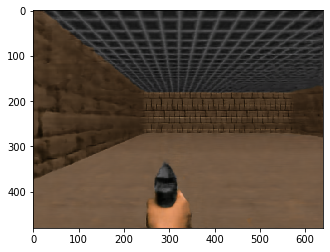

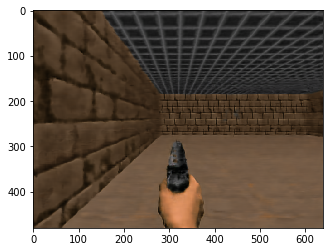

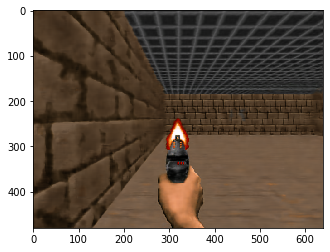

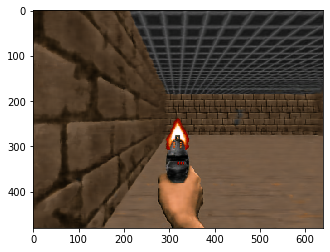

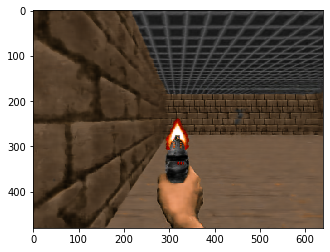

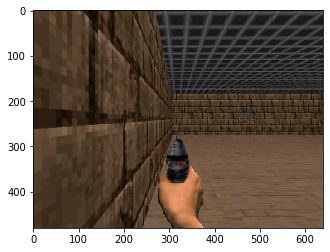

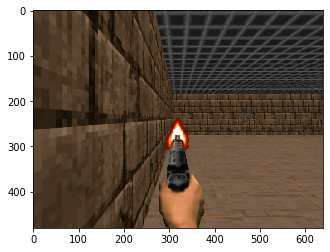

KeyboardInterrupt: 

In [35]:
# Play
vizdoom_path = "../../../../Mech Punk/Anaconda3/envs/vizdoom/lib/vizdoom/scenarios/"

if __name__ == "__main__":
    # Create DoomGame instance. It will run the game and communicate with you.
    game = vzd.DoomGame()

    # Now it's time for configuration!
    # load_config could be used to load configuration instead of doing it here with code.
    # If load_config is used in-code configuration will also work - most recent changes will add to previous ones.
    # game.load_config("../../scenarios/basic.cfg")

    # Sets path to additional resources wad file which is basically your scenario wad.
    # If not specified default maps will be used and it's pretty much useless... unless you want to play good old Doom.
    game.set_doom_scenario_path(vizdoom_path + "basic.wad")
    # Sets map to start (scenario .wad files can contain many maps).
    game.set_doom_map("map01")

    # Sets resolution. Default is 320X240
    game.set_screen_resolution(vzd.ScreenResolution.RES_640X480)

    # Sets the screen buffer format. Not used here but now you can change it. Default is CRCGCB.
    game.set_screen_format(vzd.ScreenFormat.RGB24)

    # Enables depth buffer.
    game.set_depth_buffer_enabled(True)

    # Enables labeling of in game objects labeling.
    game.set_labels_buffer_enabled(True)

    # Enables buffer with top down map of the current episode/level.
    game.set_automap_buffer_enabled(True)

    # Enables information about all objects present in the current episode/level.
    game.set_objects_info_enabled(True)

    # Enables information about all sectors (map layout).
    game.set_sectors_info_enabled(True)

    # Sets other rendering options (all of these options except crosshair are enabled (set to True) by default)
    game.set_render_hud(False)
    game.set_render_minimal_hud(False)  # If hud is enabled
    game.set_render_crosshair(False)
    game.set_render_weapon(True)
    game.set_render_decals(False)  # Bullet holes and blood on the walls
    game.set_render_particles(False)
    game.set_render_effects_sprites(False)  # Smoke and blood
    game.set_render_messages(False)  # In-game messages
    game.set_render_corpses(False)
    game.set_render_screen_flashes(True)  # Effect upon taking damage or picking up items

    # Adds buttons that will be allowed.
    game.add_available_button(vzd.Button.MOVE_LEFT)
    game.add_available_button(vzd.Button.MOVE_RIGHT)
    game.add_available_button(vzd.Button.ATTACK)

    # Adds game variables that will be included in state.
    game.add_available_game_variable(vzd.GameVariable.AMMO2)

    # Causes episodes to finish after 200 tics (actions)
    game.set_episode_timeout(300)

    # Makes episodes start after 10 tics (~after raising the weapon)
    game.set_episode_start_time(10)

    # Makes the window appear (turned on by default)
    game.set_window_visible(False)

    # Turns on the sound. (turned off by default)
    game.set_sound_enabled(False)

    # Sets the livin reward (for each move) to -1
    game.set_living_reward(-1)

    # Sets ViZDoom mode (PLAYER, ASYNC_PLAYER, SPECTATOR, ASYNC_SPECTATOR, PLAYER mode is default)
    game.set_mode(vzd.Mode.PLAYER)

    # Enables engine output to console.
    #game.set_console_enabled(True)

    # Initialize the game. Further configuration won't take any effect from now on.
    game.init()

    # Define some actions. Each list entry corresponds to declared buttons:
    # MOVE_LEFT, MOVE_RIGHT, ATTACK
    # game.get_available_buttons_size() can be used to check the number of available buttons.
    # 5 more combinations are naturally possible but only 3 are included for transparency when watching.
    actions = [[True, False, False], [False, True, False], [False, False, True]]

    # Run this many episodes
    episodes = 100000000

    # Sets time that will pause the engine after each action (in seconds)
    # Without this everything would go too fast for you to keep track of what's happening.
    sleep_time = 1.0 / vzd.DEFAULT_TICRATE  # = 0.028
    

    for i in range(episodes):
        print("Episode #" + str(i + 1))

        # Starts a new episode. It is not needed right after init() but it doesn't cost much. At least the loop is nicer.
        game.new_episode()

        action_counter = 0
        counter = 0
        
        
        while not game.is_episode_finished():
            
            action_counter-=1

            # Gets the state
            state = game.get_state()

            # Which consists of:
            n = state.number
            vars = state.game_variables
            screen_buf = state.screen_buffer
            depth_buf = state.depth_buffer
            labels_buf = state.labels_buffer
            automap_buf = state.automap_buffer
            labels = state.labels
            objects = state.objects
            sectors = state.sectors
            
            time.sleep(0.1)
            
            frame = screen_buf/255
            plt.imshow(autoencoder_model.predict(np.expand_dims(frame,0))[0])
            plt.show()
#             if action_counter < 0:
#                 action = choice(actions)
#                 action_counter = np.random.randint(0,20)
            action = choice(actions)
            r = game.make_action(action,12)

In [ ]:
game.make_action(action)

In [14]:
encodings = encoder_model.predict(np.array(frames[0:100]))

In [22]:
encoding_drawing = encodings.mean(axis=0) + encodings.std(axis=0) * np.random.randn(32)

In [25]:
frame_drawing = decoder_model.predict(encoding_drawing.reshape(1,-1))[0]

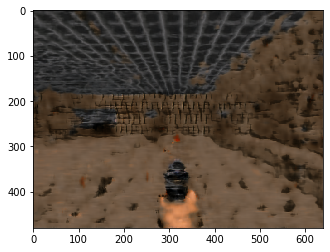

In [27]:
plt.imshow(frame_drawing)